MVI(Mangrove Vegetation Index)

The Mangrove Vegetation Index (MVI) was developed to map mangroves extent from remotely-sensed imageries accurately and quickly. MVI measures the probability of a pixel to be a ‘mangrove’ by extracting the greenness and moisture information from the green, NIR, and SWIR bands. The range of MVI values may vary depending on factors such as land cover classes, climatic conditions, or tidal conditions. Mapping the scope of mangrove sites involves setting a maximum and minimum MVI threshold to separate them from other land cover classes and vegetation.

Although the MVI has a high index accuracy, its mapping performance is limited by some biophysical and environmental factors. Misclassification occurs in aquacultural areas, irrigated croplands, and sites with palm trees where mangrove and surrounding vegetation pixels have highly similar spectral signatures. There are scenes with complex environments, such as in aquaculture areas and along a network of rivers and streams, where an optimal threshold varies across the site, and setting a single MVI threshold may not yield excellent results.

In [2]:
%matplotlib inline 
"""This is a command that specifies that the output of Matplotlib plots should be displayed directly below 
the code cell in which they are created."""

import datacube #This provides an interface for querying and retrieving remote sensing data from open data repositories.
from deafrica_tools.plotting import rgb #This function is used to generate a color image from multiple bands of satellite data.
import odc.algo #This line imports algorithms from the Open Data Cube package that can be used for processing remote sensing data.
import matplotlib.pyplot as plt #This line imports the Matplotlib library, which is a popular Python plotting library.
from datacube.utils.cog import write_cog #This function can be used to write data to a Cloud Optimized GeoTIFF (COG) format.

dc = datacube.Datacube(app="04_Plotting")
'''This line creates a new Datacube object, which is used to connect to a remote data repository and query for data. 
The app parameter specifies a name for the application that is making the query.'''

#22.454481733875678, 69.03921488827537
#22.20376806142779, 70.05283866719262
 # 22.487574, 69.359762
 # 22.349198, 69.556143
lat_range = (22.349198, 22.487574)
lon_range = (69.556143, 69.359762)
time_range = ('2022-01-15', '2023-12-15')
ds = dc.load(product="s2a_sen2cor_granule",
             measurements=["red","green","nir","swir_1"],
             x=lon_range,
             y=lat_range,
             time=time_range,
             output_crs='EPSG:6933',
             resolution=(-30, 30))

'''This line queries the remote data repository for satellite data. The product parameter specifies the name of the 
product to query for, which in this case is s2a_sen2cor_granule. The measurements parameter specifies which bands 
of data to retrieve, in this case, it's red, green, nir, and swir_1. The x and y parameters specify the longitude 
and latitude ranges of the query. The time parameter specifies the time range of the query. The output_crs parameter 
specifies the coordinate reference system (CRS) of the output data. The resolution parameter specifies the pixel 
resolution of the output data.'''

print(ds)

<xarray.Dataset>
Dimensions:      (time: 2, y: 546, x: 633)
Coordinates:
  * time         (time) datetime64[ns] 2022-10-27T06:03:06.508430 2023-02-14T...
  * y            (y) float64 2.798e+06 2.798e+06 ... 2.781e+06 2.781e+06
  * x            (x) float64 6.692e+06 6.692e+06 ... 6.711e+06 6.711e+06
    spatial_ref  int32 6933
Data variables:
    red          (time, y, x) uint16 1824 1793 1792 1798 ... 1767 1792 1767 1765
    green        (time, y, x) uint16 2164 2170 2136 2140 ... 1716 1736 1711 1743
    nir          (time, y, x) uint16 1205 1208 1218 1200 ... 2663 2679 2695 2680
    swir_1       (time, y, x) uint16 1093 1087 1087 1090 ... 2284 2279 2276 2276
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref


"The 'rgb' function generates the RGB image using the specified bands and time indices. In this case, \nthe NIR (Near Infrared) band is mapped to the red channel, the red band is mapped to the green channel, \nand the green band is mapped to the blue channel. This combination often produces visually appealing and \ninformative images."

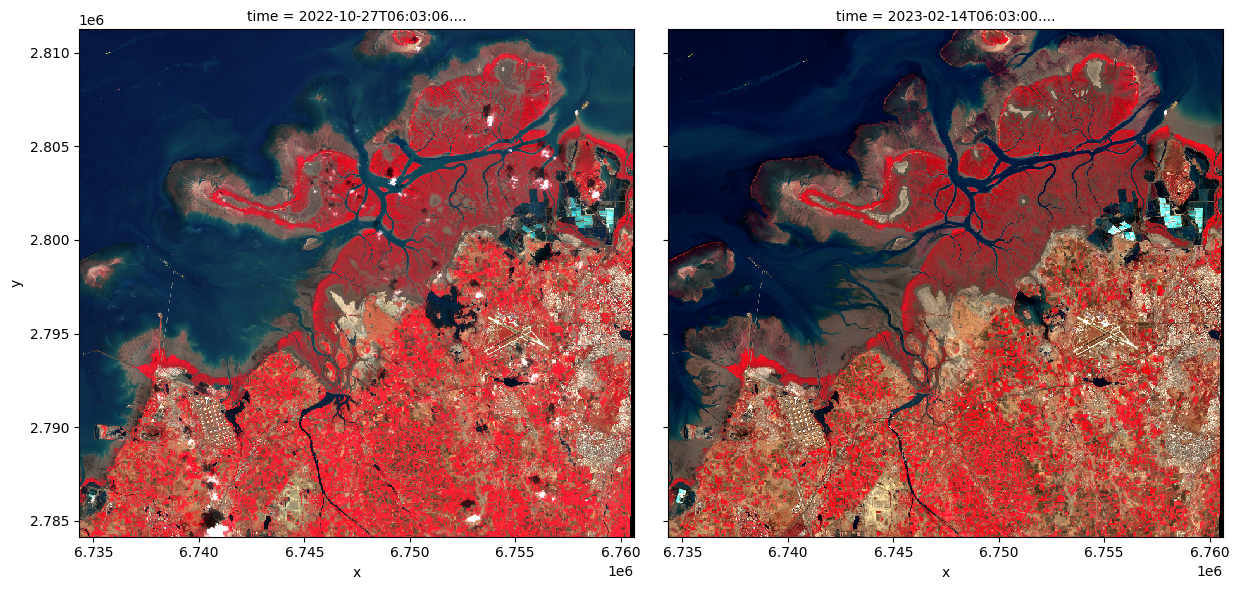

In [2]:
#dataset=ds
rgb(ds,bands=['nir','red','green'],index=[0,1])

'''The 'rgb' function generates the RGB image using the specified bands and time indices. In this case, 
the NIR (Near Infrared) band is mapped to the red channel, the red band is mapped to the green channel, 
and the green band is mapped to the blue channel. This combination often produces visually appealing and 
informative images.'''


Baloloy developed and proposed the Mangrove Vegetation Index (MVI), a new simplified index for fast and accurate mapping of mangrove extent from remotely-sensed images.

In [3]:
# convert dataset to float32 datatype so no-data values are set to NaN
ds =  odc.algo.to_f32(ds)

# Calculate the components that make up the MVI calculation
band_diff = ds.nir - ds.green
band_dif = ds.swir_1 - ds.green

# Calculate MVI and store it as a measurement in the original dataset
mvi = ds.nir - ds.green / ds.swir - ds.green
print(mvi)

<xarray.DataArray (time: 2, y: 903, x: 877)>
array([[[0.97252744, 0.97414964, 0.9749652 , ..., 0.9284188 ,
         0.92124355, 0.8931141 ],
        [0.97083336, 0.98637605, 0.96216214, ..., 0.9322034 ,
         0.91020405, 0.9013361 ],
        [0.96486485, 0.9631094 , 0.9554974 , ..., 0.9303867 ,
         0.91719747, 0.9222689 ],
        ...,
        [0.7026349 , 0.66725665, 0.6440583 , ...,        nan,
                nan,        nan],
        [0.990228  , 0.62118495, 0.6510565 , ...,        nan,
                nan,        nan],
        [0.9084249 , 0.7611257 , 0.6656977 , ...,        nan,
                nan,        nan]],

       [[1.01      , 0.9896907 , 1.0167364 , ..., 0.980226  ,
         0.9821183 , 0.97006804],
        [1.0181452 , 1.026749  , 1.0289257 , ..., 0.9707113 ,
         0.9776848 , 0.9597781 ],
        [1.0371901 , 1.0210526 , 1.010142  , ..., 0.9927954 ,
         0.9613793 , 0.96629214],
        ...,
        [0.7121212 , 0.672615  , 0.6677675 , ...,        nan,
 



The Mangrove Vegetation Index (MVI) equation is in the form:

    𝑀𝑉𝐼 = (𝑁𝐼𝑅 − 𝐺𝑟𝑒𝑒𝑛)/(𝑆𝑊𝐼𝑅1 − 𝐺𝑟𝑒𝑒𝑛)

where NIR, Green, and SWIR1 are the band 8, band 3, and band 11 reflectance values of Sentinel-2 imagery. The | NIR – Green | enhances the differences of vegetation greenness between mangrove pixels and other vegetation, while | SWIR1 – Green | captures the distinct moisture of mangrove pixels apart from non- mangrove pixels.

From the study sites, the highest MVI values recorded were those of mangrove pixels within the range of 4.5 to 16.5 followed by non-mangrove vegetation with a maximum threshold of 3.6.

In [4]:
mvi.values

array([[[0.97252744, 0.97414964, 0.9749652 , ..., 0.9284188 ,
         0.92124355, 0.8931141 ],
        [0.97083336, 0.98637605, 0.96216214, ..., 0.9322034 ,
         0.91020405, 0.9013361 ],
        [0.96486485, 0.9631094 , 0.9554974 , ..., 0.9303867 ,
         0.91719747, 0.9222689 ],
        ...,
        [0.7026349 , 0.66725665, 0.6440583 , ...,        nan,
                nan,        nan],
        [0.990228  , 0.62118495, 0.6510565 , ...,        nan,
                nan,        nan],
        [0.9084249 , 0.7611257 , 0.6656977 , ...,        nan,
                nan,        nan]],

       [[1.01      , 0.9896907 , 1.0167364 , ..., 0.980226  ,
         0.9821183 , 0.97006804],
        [1.0181452 , 1.026749  , 1.0289257 , ..., 0.9707113 ,
         0.9776848 , 0.9597781 ],
        [1.0371901 , 1.0210526 , 1.010142  , ..., 0.9927954 ,
         0.9613793 , 0.96629214],
        ...,
        [0.7121212 , 0.672615  , 0.6677675 , ...,        nan,
                nan,        nan],
        [1.0

<Figure size 400x400 with 0 Axes>

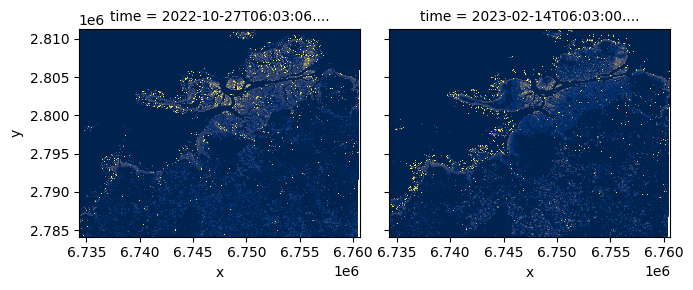

In [5]:
plt.figure(figsize=(4, 4))
mvi.plot(col='time', cmap='cividis', vmin=1 ,vmax=16, add_colorbar=False)
plt.show()

In [6]:
variable=mvi.values
print(variable)

[[[0.97252744 0.97414964 0.9749652  ... 0.9284188  0.92124355 0.8931141 ]
  [0.97083336 0.98637605 0.96216214 ... 0.9322034  0.91020405 0.9013361 ]
  [0.96486485 0.9631094  0.9554974  ... 0.9303867  0.91719747 0.9222689 ]
  ...
  [0.7026349  0.66725665 0.6440583  ...        nan        nan        nan]
  [0.990228   0.62118495 0.6510565  ...        nan        nan        nan]
  [0.9084249  0.7611257  0.6656977  ...        nan        nan        nan]]

 [[1.01       0.9896907  1.0167364  ... 0.980226   0.9821183  0.97006804]
  [1.0181452  1.026749   1.0289257  ... 0.9707113  0.9776848  0.9597781 ]
  [1.0371901  1.0210526  1.010142   ... 0.9927954  0.9613793  0.96629214]
  ...
  [0.7121212  0.672615   0.6677675  ...        nan        nan        nan]
  [1.0193704  0.6130993  0.6679739  ...        nan        nan        nan]
  [0.85400844 0.8266254  0.6764314  ...        nan        nan        nan]]]


In [7]:
min_value=4
max_value=14
count=((variable>=min_value)&(variable<=max_value)).sum()
print("count = ",count)

count =  69598


In [8]:
shape=variable.shape
print(shape)

(2, 903, 877)


In [9]:
total=shape[0]*shape[1]*shape[2]

In [10]:
print(total)

1583862


6263.82
136283.76


<AxesSubplot:>

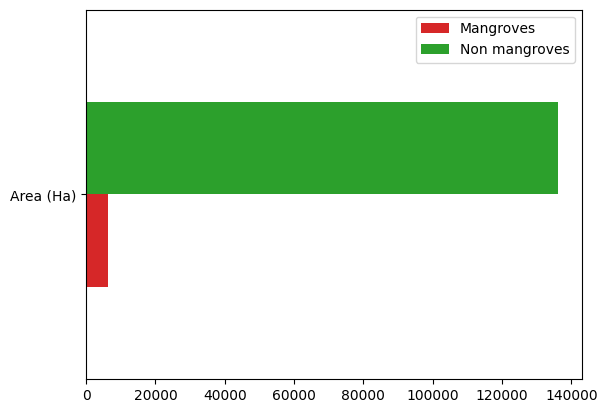

In [11]:
import pandas as pd
mangroves=(count*900)/10000
not_mangroves=((total-count)*900)/10000

print(mangroves)
print(not_mangroves)
counts = {
          'Mangroves': mangroves,
          'Non mangroves': not_mangroves
          }

df = pd.DataFrame(counts, index=['Area (Ha)'])
df.plot.barh(color=['tab:red','tab:green'])

In [12]:
ndvi = (ds.nir - ds.red) / (ds.nir + ds.red)
print(ndvi)

<xarray.DataArray (time: 2, y: 903, x: 877)>
array([[[-0.07673164, -0.08357588, -0.08447774, ..., -0.1488117 ,
         -0.16530395, -0.16793893],
        [-0.08229426, -0.09037901, -0.08036454, ..., -0.15625   ,
         -0.1642529 , -0.16730972],
        [-0.08566722, -0.08573784, -0.08942425, ..., -0.13499442,
         -0.14442413, -0.16207513],
        ...,
        [ 0.16047928,  0.1629795 ,  0.1570314 , ...,         nan,
                 nan,         nan],
        [ 0.24418175,  0.13586193,  0.16196488, ...,         nan,
                 nan,         nan],
        [ 0.24971794,  0.16720197,  0.15886027, ...,         nan,
                 nan,         nan]],

       [[-0.04335664, -0.03448276, -0.04766355, ..., -0.09991387,
         -0.10600255, -0.10676308],
        [-0.04295051, -0.04507042, -0.04335664, ..., -0.1045668 ,
         -0.10350727, -0.10230179],
        [-0.05140187, -0.04642526, -0.05180389, ..., -0.09900562,
         -0.09746672, -0.10068846],
        ...,
        [

In [13]:
import datacube
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import joblib
from dea_tools.plotting import rgb, display_map
from matplotlib import pyplot as plt
import odc.algo
import datetime
import csv

In [14]:
import numpy as np

ndvi_threshold = 0.4

# Create forest mask based on NDVI
mangrove_mask_ndvi = np.where(ndvi > ndvi_threshold, 1, 0)


mvi_threshold = 3.5

# Create forest mask based on MVI within the threshold range
mangrove_mask_mvi = np.where(mvi > mvi_threshold, 1, 0)

regular_mask= np.where(ndvi <= 0.6, True, False)

closed_mask=np.where(ndvi > 0.6, True, False)

mangrove = np.logical_and(mangrove_mask_ndvi, mangrove_mask_mvi)
regular=np.logical_and(mangrove, regular_mask)
closed=np.logical_and(mangrove, closed_mask)

print(mangrove)
print(regular)
print(closed)

[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]]
[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  

In [15]:
# Calculate the area of each pixel
pixel_area = abs(ds.geobox.affine[0] * ds.geobox.affine[4])

In [16]:
data = [['day', 'month', 'year', 'mangrove','regular','closed', 'total']]

for i in range(mangrove.shape[0]):
    data_time = str(ndvi.time[i].values).split("T")[0]
    print(data_time)
    new_data_time = data_time.split("-")
    
    # Calculate the total mangrove cover area
    mangrove_cover_area = np.sum(mangrove[i]) * pixel_area
    regular_cover_area=np.sum(regular[i])*pixel_area
    closed_cover_area=np.sum(closed[i])*pixel_area

    original_array = np.where(ndvi > -10, 1, 0)
    original = np.sum(original_array[i]) * pixel_area

    print("Mangrove", mangrove_cover_area/1000000, "sq. km")
    print("Regular",regular_cover_area/1000000, "sq. km")
    print("Closed",closed_cover_area/1000000, "sq. km")
    print("Original", original/1000000, "sq. km")
    print()
    data.append([new_data_time[2], new_data_time[1], new_data_time[0], mangrove_cover_area/1000000, regular_cover_area/1000000, closed_cover_area/1000000, original/1000000])

2022-10-27
Mangrove 17.208 sq. km
Regular 16.4358 sq. km
Closed 0.7722 sq. km
Original 710.3763 sq. km

2023-02-14
Mangrove 23.2137 sq. km
Regular 20.16 sq. km
Closed 3.0537 sq. km
Original 710.3763 sq. km



In [17]:
csv_file = 'ml_mangrove_data.csv'

# Open the CSV file in write mode
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)

    # Write the array data to the CSV file
    for row in data:
        writer.writerow(row)

print("CSV file generated successfully.")

CSV file generated successfully.


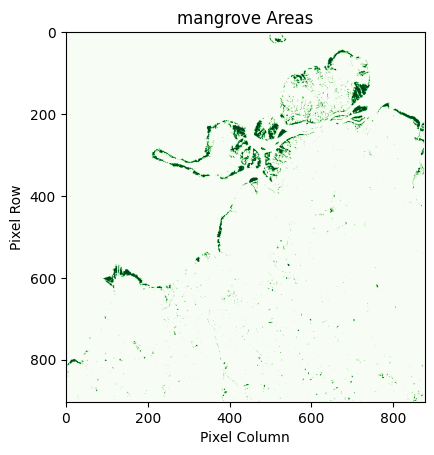

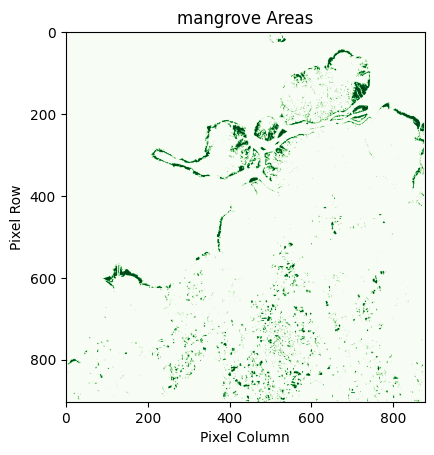

In [18]:
for i in range(mangrove.shape[0]):
    # Create a plot of the forest areas
    plt.imshow(mangrove[i], cmap='Greens')  # Green color for forest areas
    # plt.imshow(evi[0], cmap='Reds', alpha=0.3)  # Red color for non-forest areas

    # Add labels and title
    plt.xlabel('Pixel Column')
    plt.ylabel('Pixel Row')
    plt.title('mangrove Areas')

    # Show the plot
    plt.show()

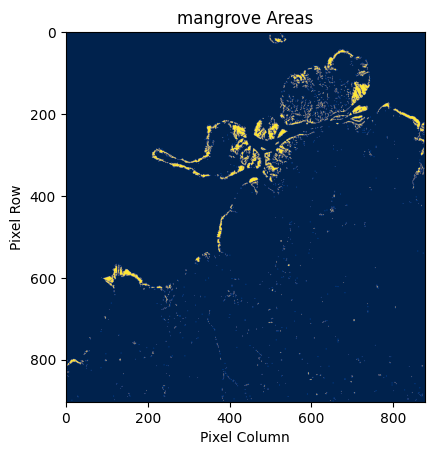

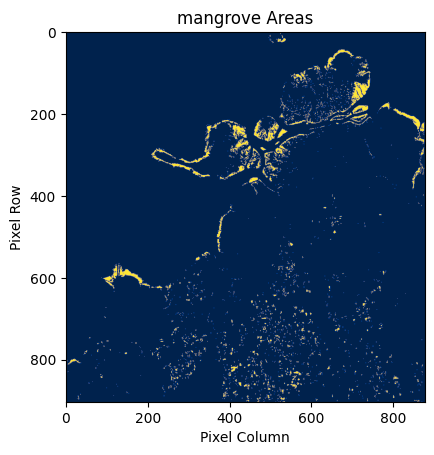

In [19]:
for i in range(regular.shape[0]):
    # Create a plot of the forest areas
    plt.imshow(regular[i], cmap='cividis')  # Green color for forest areas
    # plt.imshow(evi[0], cmap='Reds', alpha=0.3)  # Red color for non-forest areas

    # Add labels and title
    plt.xlabel('Pixel Column')
    plt.ylabel('Pixel Row')
    plt.title('mangrove Areas')

    # Show the plot
    plt.show()

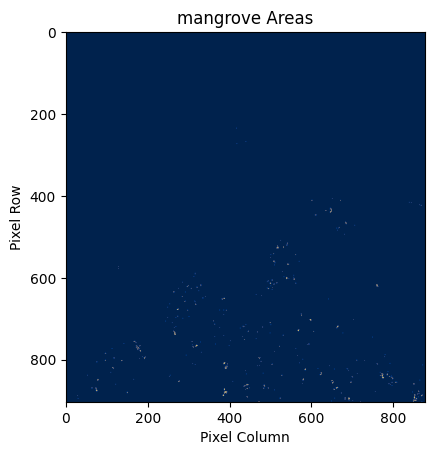

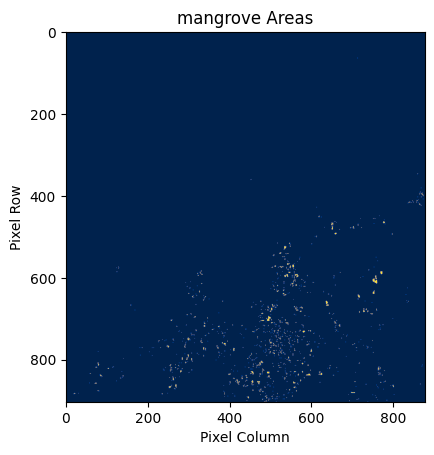

In [20]:
for i in range(closed.shape[0]):
    # Create a plot of the forest areas
    plt.imshow(closed[i], cmap='cividis')  # Green color for forest areas
    # plt.imshow(evi[0], cmap='Reds', alpha=0.3)  # Red color for non-forest areas

    # Add labels and title
    plt.xlabel('Pixel Column')
    plt.ylabel('Pixel Row')
    plt.title('mangrove Areas')

    # Show the plot
    plt.show()